In [ ]:
pip install neattext
pip intall  textblob
pip install classy_classification
pip install geotext

# Importing Necessities

In [343]:
import pandas as pd               #package for data analysi
import matplotlib.pyplot as plt   #package for data visalization
import seaborn as sns             #another package for data visualization
from textblob import TextBlob     #package for text analysis
import neattext as nt             #package for text cleaning

# Reading the Dataset

In [344]:
df=pd.read_csv("Articles.csv",encoding='cp1252')

### Shape of the Dataset

In [345]:
df.shape

(2692, 4)

### Sample of the Dataset

In [346]:
df.head(5)

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


# Checking Null Values

In [347]:
df.isnull().sum()

Article     0
Date        0
Heading     0
NewsType    0
dtype: int64

# News Type Distribution

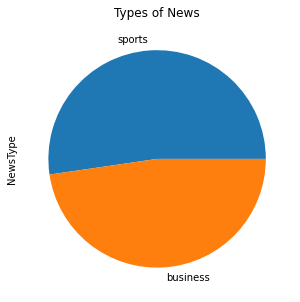

In [348]:
plt.figure(figsize=(10, 5))
df.NewsType.value_counts().plot.pie()
plt.title("Types of News")
plt.show()

### Getting Cities and Countries from the Articles

In [349]:
from geotext import GeoText  #package for getting geographic locations from the text
places = GeoText(articles_combine)
cities=places.cities
countries=places.countries

# Occurences of the Countries

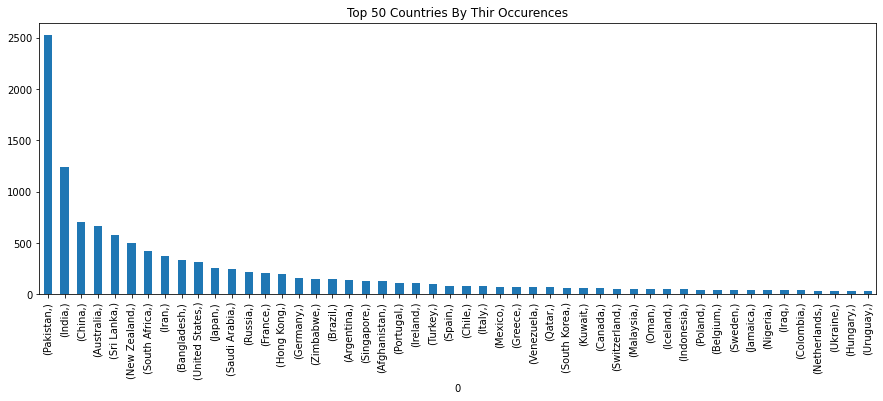

In [350]:
plt.figure(figsize=(15, 5))
pd.DataFrame(countries).value_counts()[0:50].plot.bar()
plt.title("Top 50 Countries By Thir Occurences")
plt.show()

# Occurences of the Cities

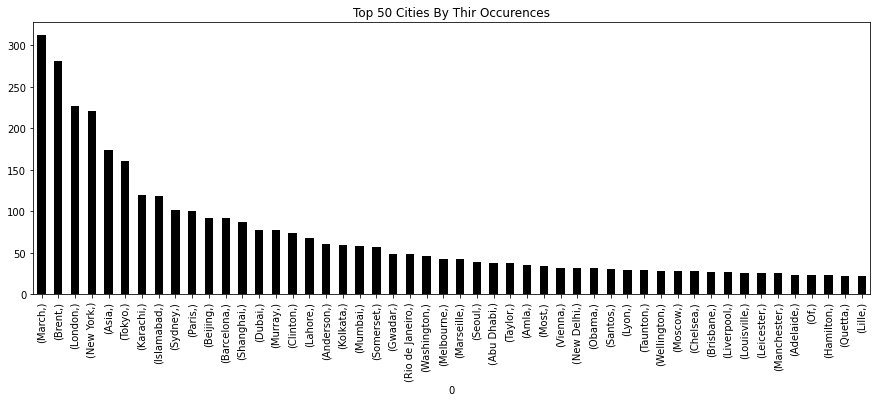

In [351]:
plt.figure(figsize=(15, 5))
pd.DataFrame(cities).value_counts()[0:50].plot.bar(color='black')
plt.title("Top 50 Cities By Thir Occurences")
plt.show()

# Parts of Speech in Articles

In [352]:
articles_combine=''.join(df['Article'])

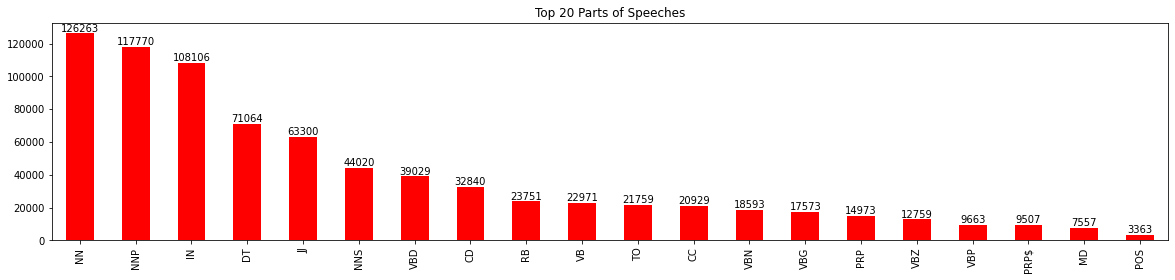

In [354]:
fig,ax = plt.subplots(figsize=(20,4))  #define figure size
blob = TextBlob(str(articles_combine))   #comments variable contains all the comments
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar',color='red')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top 20 Parts of Speeches")
plt.show()

# Text Metrics for Article Feature

In [355]:
from neattext import TextMetrics    #importing textmetrics from neattext
docx = TextMetrics()
docx.text = articles_combine
docx.word_stats()              #displaying the word statistics

{'text_length': 4872573,
 'num_of_vowels': 1459200,
 'num_of_consonants': 2397100,
 'num_of_stopwords': 328684,
 'vowels_stats': {'a': 349100,
  'e': 445158,
  'i': 292016,
  'o': 271123,
  'u': 101803},
 'consonants_stats': {'b': 62348,
  'c': 121108,
  'd': 159437,
  'f': 86139,
  'g': 82683,
  'h': 171770,
  'j': 8636,
  'k': 39328,
  'l': 159218,
  'm': 98057,
  'n': 289677,
  'p': 86925,
  'q': 4018,
  'r': 254707,
  's': 255425,
  't': 339624,
  'v': 35733,
  'w': 69535,
  'x': 9267,
  'y': 58250,
  'z': 5215}}

# Processing for Model Training

### Getting Labels for the Given Text

In [356]:
newstype_list=df['NewsType'].value_counts().index.tolist()

### Separating Articles Related to Business and Sports and Coverting them into a List

In [357]:
business_list=df[df['NewsType']=='business']['Heading'].to_list()

In [358]:
sports_list=df[df['NewsType']=='sports']['Heading'].to_list()

In [359]:
model_data={}

In [360]:
### We need dictionary for Model Training therefore we need to convert our data into dictionary

In [361]:
model_data={newstype_list[0]:sports_list,newstype_list[1]:business_list}

### Importing Packaged for Text Classification

In [362]:
import spacy  #package for text analysis
import classy_classification  #supportive package for text classification

# Model Training

In [372]:
model=input("Enter Your Desired Spacy Model")

In [ ]:
# spacy download en_core_web_md (run this command in cmd)

In [363]:
nlp = spacy.load("en_core_web_md")   #loading medium model of spacy
nlp.add_pipe("text_categorizer", config={"data": model_data, "model": model}) #using spacy pipe for model training

Fitting 5 folds for each of 6 candidates, totalling 30 fits


# Building Sentence Tokenizer

In [364]:
sentence_model = spacy.blank("en")

In [365]:
sentence_model.add_pipe("sentencizer")  #adding sentence tokenizer pipe

###  Reading the Document

In [366]:
with open ("inst.txt", "r") as f:
    text = f.read()

In [367]:
sentences = sentence_model(text) #converting given text to sentences

# Calculating Probability of Each Sentence and Storing it

In [368]:
classified_data = []
for sentence in sentences.sents:
    doc = nlp(sentence.text)
    classified_data.append(doc._.cats) #.cats gives probability that how much a 
                                        #sentence is similar to labels on which model trained

In [369]:
classified_df=pd.DataFrame(classified_data)

# Printing the Final Results

In [370]:
for i in classified_df.columns:
    print(f'Your Documents {round(sum(classified_df[i]/classified_df.shape[0]),4)*100}% Matched with {i} Label' )

Your Documents 95.19% Matched with business Label
Your Documents 4.81% Matched with sports Label
